In [1]:
from msmbuilder.example_datasets import FsPeptide
from msmbuilder.featurizer import DihedralFeaturizer

fs = FsPeptide().get().trajectories
n_atoms = fs[0].n_atoms
fs_dih_feat = DihedralFeaturizer(['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4']).transform(fs)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [2]:
from msmbuilder.decomposition import tICA
tica = tICA(lag_time=100)
tica.fit(fs_dih_feat)

tICA(gamma=0.05, lag_time=100, n_components=148, weighted_transform=False)

In [3]:
X = tica.transform(fs_dih_feat)

In [4]:
X_ = np.vstack(X)

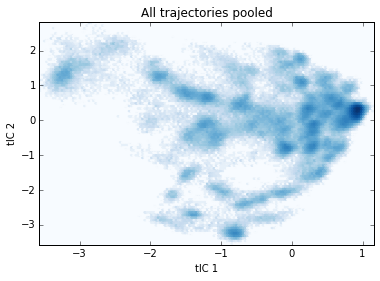

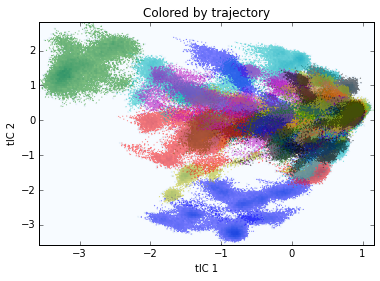

In [5]:
plt.hexbin(X_[:,0],X_[:,1],bins='log',gridsize=150,cmap='Blues')
plt.xlabel('tIC 1')
plt.ylabel('tIC 2')
plt.title('All trajectories pooled')

plt.figure()

plt.hexbin(X_[:,0],X_[:,1],bins='log',gridsize=150,cmap='Blues')

#colors = plt.cm.rainbow(range(len(X)))

for i,x in enumerate(X):
    plt.plot(x[:,0],x[:,1],alpha=0.5,linewidth=1,linestyle=':')#,c=colors[i])
plt.xlabel('tIC 1')
plt.ylabel('tIC 2')
plt.title('Colored by trajectory')

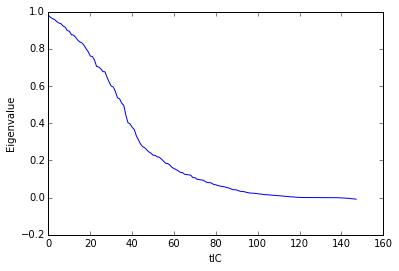

In [6]:
plt.plot(tica.eigenvalues_)
plt.xlabel('tIC')
plt.ylabel('Eigenvalue')